# **3-4 Regression Discontinuity Design Group 2**
Mike, Pam, Kaleb, Sakif, Anne  GitHub: Anne Cloutier : Vetiver5

# **Data source** 
For all 3 tasks (March 2020 school lockdown, August 2020 school reopening, December 2020 lockdown), we're using Government of Canada's COVID-19 data.
(2020.01.01 - 2021.01.22, downloaded from https://health-infobase.canada.ca/covid-19/).

# **Covid Measure** 
For all 3 events, we have used the daily count of new COVID-19 cases as our measure.

# **Analyzed periods** 
Two periods were analyzed : an 'annual' view with 11 months of data, and 3 events with 30 days before and after.

# **1. Year 1 analysis**

Year 1 analysis starts at March 1st 2020 and ends on January 22nd 2021.

We looked at new Covid-19 case numbers in Quebec from the first lockdown (Mar 3 2020) until the final date of our dataset (Jan 22 2021). Although our data source would have allowed us to consider cases before March 1st, these precede the true outbreak of COVID-19 in Quebec and would have skewed our analysis.

Our code computed an R-squared value of 0.175 for the annual view, indicating insignificant results overall. The intercept coefficient (that is, the number of positive cases of new Covid-19 at that time) is 603.3499 with a standard error of 48.052.

Together, both values yield a large confidence interval [508.526, 698.174] at p = 0.025 on both ends of the data. The p-value is 0.000, revealing that the number of cases is significant.

When we added a constant to the year's data, the R-squared value jumped to a more respectable 0.708. The intercept coefficient (the number of cases over the number of days), however, showed a value of -2530.5202 with a standard error of 209.460. We concluded that since the virus started to multiply in Quebec, COVID cases in the province went down by approximately 2500; however, there was still a fluctuation of approximately 182 cases daily (confidence interval [-2944.583, -2116.458]) in the time frame of March 2020 to January 2021.

# **2. 30 days before and after target event dates**

This slice provides valid context given the virus's incubation and eclosion periods. As well, approximately a month of data after the last event (Dec 25 2020) was available. To reinforce the use of 30 days, we also calculated the bandwidth_opt, which yielded a value of approximately 30.5.


# **Data prep**

In [ ]:
#implement Spark environment for RDD package usage
def setupSpark():
  # Spark needs to run with Java 8 ... 
  !pip install -q findspark
  !apt-get install openjdk-8-jdk-headless > /dev/null
  !echo 2 | update-alternatives --config java > /dev/null
  # !java -version
  import os, findspark
  os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'
  # !echo JAVA_HOME=$JAVA_HOME
  !pip install -q pyspark
  findspark.init(spark_home='/usr/local/lib/python3.6/dist-packages/pyspark')
  !pyspark --version


setupSpark()

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /___/ .__/\_,_/_/ /_/\_\   version 3.0.1
      /_/
                        
Using Scala version 2.12.10, OpenJDK 64-Bit Server VM, 1.8.0_275
Branch HEAD
Compiled by user ubuntu on 2020-08-28T07:36:48Z
Revision 2b147c4cd50da32fe2b4167f97c8142102a0510d
Url https://gitbox.apache.org/repos/asf/spark.git
Type --help for more information.


In [ ]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
    
spark = SparkSession\
        .builder\
        .master('local[*]')\
        .getOrCreate()
sc = spark.sparkContext

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
#load base packages
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns

In [ ]:
#install rdd
!pip install rdd

In [ ]:
from rdd import rdd

In [ ]:
###CODE START###
#Load data
qc = pd.read_csv("https://raw.githubusercontent.com/sakifff/m3-4-rdd-project/main/covid19-download.csv")

#Prep data

#Filter Canada-wide data to generate a Quebec-only dataframe
qc = qc[qc['prname'] == "Quebec"].reset_index(drop=True)

In [ ]:
#Set 1st day of data set to March 1st, 2020. 
#This removes early-pandemic outliers
#It also sets the first day of our dataset to March 1st 2020 (20200301)
#creating a start for our 11-month Year 1 analysis

In [ ]:
#Convert object to Datetime object and set time-range for analysis

qc['date'] = pd.to_datetime(qc['date'])

#Create a new data column assigning a number to calendar days, facilitating
#our RDD data design so we can easily pinpoint target dates, as well as
#set date slices to 30-days before and after targets
qc['num_of_days'] = (qc['date']-qc.date[0]).apply(lambda x: x.days)

# I. One year view

View A : with constant added, statsmodel smf used


*  Start date: March 1, 2020 (day 0)
*  End date: January 22, 2021 (day 327)
*   Threshold set at the August 31st schoold reopening date (day 183)

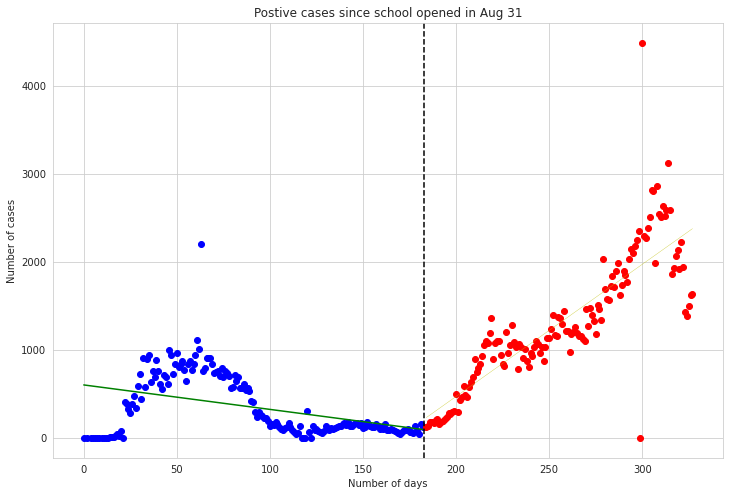

                            OLS Regression Results                            
Dep. Variable:               numtoday   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     37.66
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           5.32e-09
Time:                        02:30:02   Log-Likelihood:                -1290.6
No. Observations:                 180   AIC:                             2585.
Df Residuals:                     178   BIC:                             2592.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     603.3499     48.052     12.556      

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               numtoday   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     344.3
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           8.75e-40
Time:                        02:30:02   Log-Likelihood:                -1067.4
No. Observations:                 144   AIC:                             2139.
Df Residuals:                     142   BIC:                             2145.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2530.5202    209.460    -12.081      0.000   -2944.583   -2116.458
num_of_days    15.0140      0.809     18.555      0.000      13.414      16.614
==============================================================================
Omnibus:                       60.488   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1064.087
Skew:                           0.911   Prob(JB):                    8.64e-232
Kurtosis:                      16.192   Cond. No.                     1.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#D.1.b : REGRESSION ANALYSIS #1: VERSION b, AUGUST CLOSURE

import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import seaborn as sns

qc['const'] = 1
threshold1 = qc[qc['num_of_days'] < 183]
threshold2 = qc[qc['num_of_days'] > 183]
result1 = smf.ols(formula = "numtoday ~ num_of_days",data = threshold1).fit()
result2 = smf.ols(formula = "numtoday ~ num_of_days",data = threshold2).fit()

fig, ax = plt.subplots(figsize=(12,8))
sns.set_style("whitegrid")

ax.scatter(threshold1.num_of_days,threshold1.numtoday,color='b')
ax.plot(threshold1.num_of_days,result1.fittedvalues,color='g')
ax.scatter(threshold2.num_of_days,threshold2.numtoday,color='r')
ax.plot(threshold2.num_of_days,result2.fittedvalues,color='y',lw = 0.3)
plt.axvline(x=183,color="black", linestyle="--")
plt.title('Postive cases since school opened in Aug 31')
plt.xlabel('Day')
plt.ylabel('Cases per day')
plt.show()
print(result1.summary())
result2.summary()

# Summary analysis

**Without a constant**, the R-squared value of 0.175 notes insignificant results overall. The intercept coefficient (new Covid-19 cases at that time) is 603.3499 with a standard error of 48.052.

These values yield a large confidence interval [508.526, 698.174] at p = 0.025 on both ends of the data. The p-value is 0.000, revealing that the number of cases is significant.

**With a constant**, the R-squared value shifts to 0.708. The intercept coefficient however, registers ad -2530.5202 with a standard error of 209.460. We conclude that since the start the COVID outbreak in PQ in March, cases have declined by approximately 2500, with a daily fluctuation of approximately +/-182 cases (confidence interval [-2944.583, -2116.458]) for this value from then to Jan 2021.

# One year view B1 and B2: with constant and polynomial


* View B1: start March 1, 2020 (day 0)
* Threshold set at the August 31st school reopening date (day 183)

We generated both these models with the goal of seeing what would be required to get a good fit for the last year's outbreak in general. Although polynomials 8 (view B1) and 15 (B2) are such high exponentials that they are at risk of illustrating data disparities rather than accurately representing the COVID 19 trendline, the result is clean. Two elements play in our favour:

*   only 2 values (days, cases) play into our regression analysis 
*   days are without fluctuation, and cases increase/decrease progressively

While these lines look perfect in the graphs, it is important to note that the higher the polynomial, the more fixed the data analysis becomes. We plotted a line of best fit for desired results, which is not necessarily the most accurate reflection of the data itself.

For these reasons, a 30-day, unfitted regression analysis of January data (see the last diagram and comments in this paper) shows that there is excessive smoothing of January data due to the model, and not just due to data issues.

In order to achieve the best results, we should be using a polynomial of 2 or 3 to reflect the reality of the significance of Covid-19 as the days pass. For the purpose of the whole project, following polynomials 8 and 15, we opted to not use any polynomials for the data calculations. This was the decision we made because as we split the data in 2 of each of the lockdowns and reopening of schools. With the split data, we now had a different shape to the data: 2 straight lines. A straight line would indicate the presence of linear data, which refers to data at the first power, not at a higher power.

Other insights:

*   Before August 31st 2020 (day 183, our threshold once again here), cases peak at 2201/day on May 5th.
*   After day 183, cases peak at 2588/day on December 26th 2020.
*   Given case reporting variations during the 2020 Holidays, the steep decline in January 2021 should be interpreted cautiously.

In [ ]:
#reload standard packages + sklearn polynomial and linear regression utilities

import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

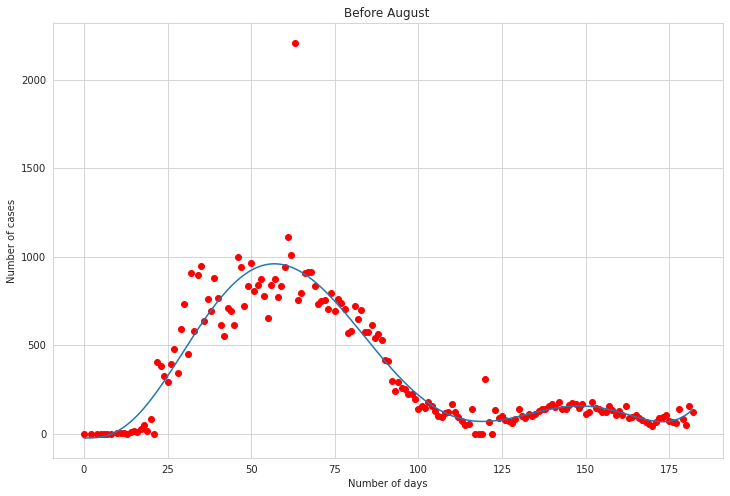

In [ ]:
threshold_x1 = qc[qc['num_of_days'] < 183]['num_of_days']
threshold_x1 = sm.add_constant(threshold_x1)
threshold_y1 = qc[qc['num_of_days'] < 183]['numtoday']

#first half uses a 8th level polynomial
poly_degree = 8
polynomial_features = PolynomialFeatures(poly_degree)
thresh_x1_poly = polynomial_features.fit_transform(threshold_x1)
thresh_x1_model = LinearRegression()

thresh_x1_model.fit(thresh_x1_poly,threshold_y1)
thresh_y1_poly_prediction = thresh_x1_model.predict(thresh_x1_poly)

x1_fig, x1_ax = plt.subplots(figsize=(12,8))

x1_ax.scatter(threshold_x1.iloc[:,1],threshold_y1,color='r')
x1_ax.plot(threshold_x1.iloc[:,1],thresh_y1_poly_prediction)
plt.title('Before August 31, 2020')
plt.xlabel('Day')
plt.ylabel('Cases per day')
plt.show()


View B2: start August 31st on school reopening date (day 183), end January 22, 2021 (day 327)

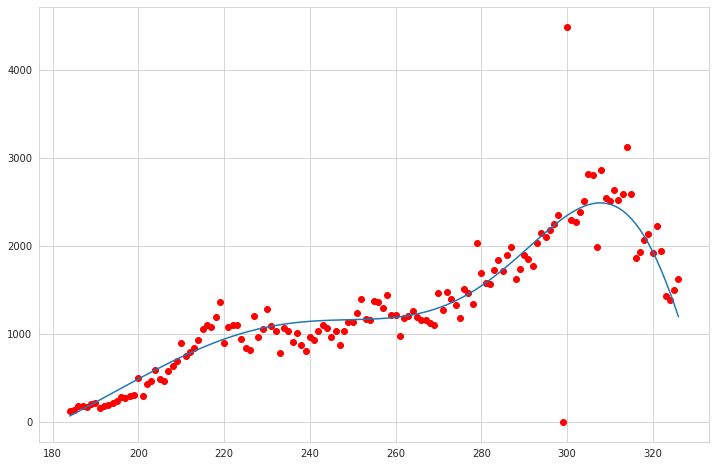

In [ ]:
qc2 = qc.copy()

qc2.drop(qc2.index[-1],inplace=True)
threshold_x2 = qc2[qc2['num_of_days'] > 183]['num_of_days']
threshold_x2 = sm.add_constant(threshold_x2)
threshold_y2 = qc2[qc2['num_of_days'] > 183]['numtoday']

#2nd half shows second curve
poly_degree = 15

polynomial_features = PolynomialFeatures(poly_degree)
thresh_x2_poly = polynomial_features.fit_transform(threshold_x2)
thresh_x2_model = LinearRegression()
thresh_x2_model.fit(thresh_x2_poly,threshold_y2)
thresh_y2_poly_prediction = thresh_x2_model.predict(thresh_x2_poly)

x2_fig, x2_ax = plt.subplots(figsize=(12,8))
x2_ax.scatter(threshold_x2.iloc[:,1],threshold_y2,color='r')
x2_ax.plot(threshold_x2.iloc[:,1],thresh_y2_poly_prediction)
plt.title('After August 31, 2020')
plt.xlabel('Day')
plt.ylabel('Cases per day')
plt.show()

## II. 60-day event-based views

In [ ]:
#Imports, read and fix data
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

link = 'https://raw.githubusercontent.com/sakifff/m3-4-rdd-project/main/covid19-download.csv'
df = pd.read_csv(link)

df = df[df['prname'] == "Quebec"].reset_index(drop=True)

df['date'] = pd.to_datetime(df['date'])

df['num_of_days'] = (df['date']-df.date[0]).apply(lambda x: x.days)

#1st lockdown :
first_lockdown = (df['date'] > '2020-03-01') & (df['date'] <= "2020-05-04")
df_1 = df.loc[first_lockdown]

#schools reopening
reopening = (df['date'] > '2020-07-31') & (df['date'] <= "2020-09-30")
df_2 = df.loc[reopening]

#2nd lockdown
second_lockdown = (df['date'] > '2020-11-22') & (df['date'] <= "2021-01-26")
df_3 = df.loc[second_lockdown]

In [ ]:
#Make Models
#1st lockdown : 
model_first_lockdown = smf.ols(formula= "numtoday ~ num_of_days", data=df_1).fit()

rdd_df1 = df_1[df_1["num_of_days"] < 32].reset_index(drop=True)
model1 = smf.ols(formula= "numtoday ~ num_of_days", data=rdd_df1).fit()

rdd_df2 = df_1[df_1["num_of_days"] > 32].reset_index(drop=True)
model2 = smf.ols(formula= "numtoday ~ num_of_days", data=rdd_df2).fit()

# First lockdown analysis : March 2020

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               numtoday   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           3.20e-19
Time:                        02:32:45   Log-Likelihood:                -413.62
No. Observations:                  61   AIC:                             831.2
Df Residuals:                      59   BIC:                             835.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -161.2655     59.679     -2.702      0.009    -280.683     -41.848
num_of_days    20.5415      1.559     13.173      0.000      17.421      23.662
==============================================================================
Omnibus:                       49.016   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.043
Skew:                           2.183   Prob(JB):                     1.67e-53
Kurtosis:                      11.750   Cond. No.                         82.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

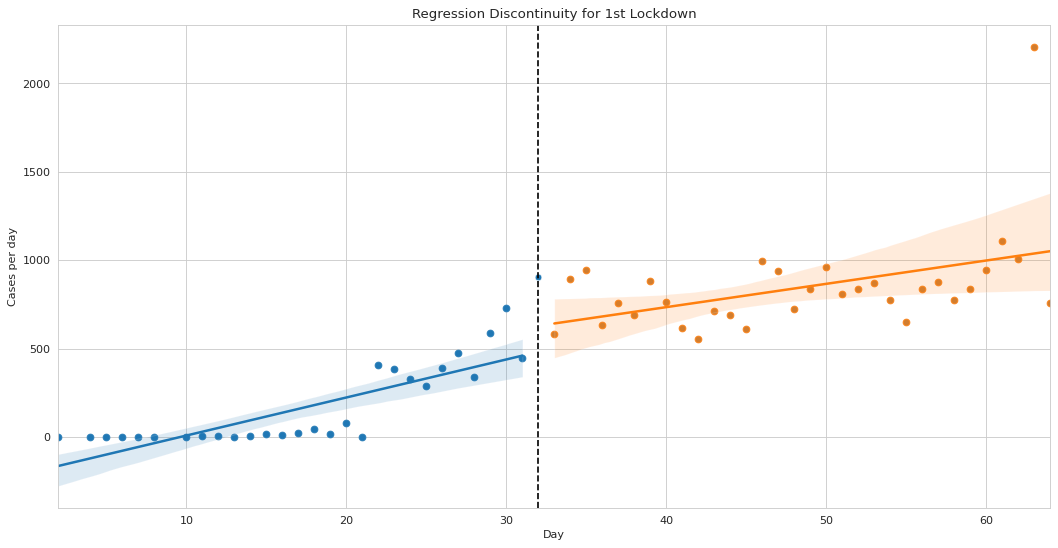

In [ ]:
#Plot
plt.figure(figsize=(16, 8), dpi=80)
sns.scatterplot(x='num_of_days', y='numtoday', data=df_1)
sns.regplot(x='num_of_days', y='numtoday', data=rdd_df1)
sns.regplot(x='num_of_days', y='numtoday', data=rdd_df2)
plt.title("Regression Discontinuity for 1st Lockdown")
plt.axvline(x=32, ls='--', c='black')
plt.xlabel("Day")
plt.ylabel("Cases per day")
model_first_lockdown.summary()

To understand the trending of daily new Covid-19 cases at the time of the first lockdown in March, we considered case counts for 30 days before and after.
*  Results yielded an R-squared value of 0.746, which is statistically more significant than results for the full-year analysis.
*   There is a difference of -161.27 cases, with a standard error rate of 69.68. This makes sense as 30 days before the lockdown, Quebec had close to 0 cases of Covid-19.
*    The confidence interval ranges widely between -280.68 and -41.85
*   The data is statistically significant as the p-value equaled 0.

## Second event: School reopening (August 31)

In [ ]:
#Schools reopening model

model_reopening = smf.ols(formula= "numtoday ~ num_of_days", data=df_2).fit()

rdd_df3 = df_2[df_2["num_of_days"] < 183].reset_index(drop=True)
rdd_df4 = df_2[df_2["num_of_days"] > 183].reset_index(drop=True)
model3 = smf.ols(formula= "numtoday ~ num_of_days", data=rdd_df2).fit()
model4 = smf.ols(formula= "numtoday ~ num_of_days", data=rdd_df3).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               numtoday   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     105.4
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           9.55e-15
Time:                        02:33:09   Log-Likelihood:                -383.89
No. Observations:                  61   AIC:                             771.8
Df Residuals:                      59   BIC:                             776.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1572.6370    177.932     -8.838      0.000   -1928.677   -1216.597
num_of_days     9.9352      0.968     10.265      0.000       7.999      11.872
==============================================================================
Omnibus:                        6.675   Durbin-Watson:                   0.235
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.803
Skew:                           0.812   Prob(JB):                       0.0333
Kurtosis:                       2.807   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

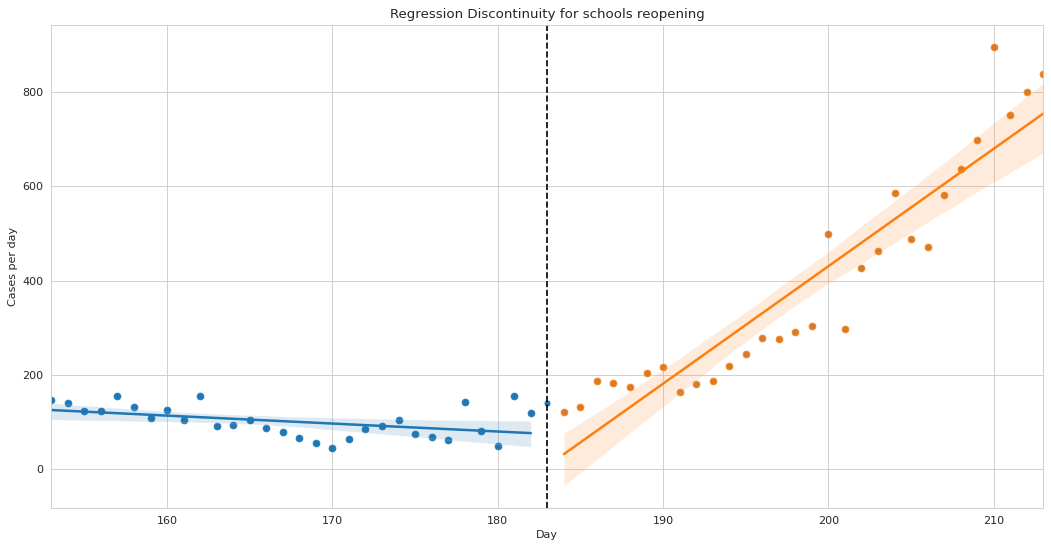

In [ ]:
#Plot
plt.figure(figsize=(16, 8), dpi=80)
sns.scatterplot(x='num_of_days', y='numtoday', data=df_2)
sns.regplot(x='num_of_days', y='numtoday', data=rdd_df3)
sns.regplot(x='num_of_days', y='numtoday', data=rdd_df4)
plt.title("Regression Discontinuity for schools reopening")
plt.axvline(x=183, ls='--', c='black')
plt.xlabel("Day")
plt.ylabel("Cases per day")
model_reopening.summary()

Results yielded an R-squared value of 0.641, with a greater spread with the R-square adjusted value at 11 points.

There is a difference of -1572.64 cases, with a standard error rate of 177.93. 

The confidence interval ranges widely between -1928.68 and -1216.6
The data is statistically significant as the p-value stays 0.

## Second lockdown analysis : December 2020

In [ ]:
#model specification

model_second_lockdown = smf.ols(formula= "numtoday ~ num_of_days", data=df_3).fit()

rdd_df5 = df_3[df_3["num_of_days"] < 297].reset_index(drop=True)
rdd_df6 = df_3[df_3["num_of_days"] > 297].reset_index(drop=True)
model5 = smf.ols(formula= "numtoday ~ num_of_days", data=rdd_df5).fit()
model6 = smf.ols(formula= "numtoday ~ num_of_days", data=rdd_df6).fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               numtoday   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     12.12
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           0.000946
Time:                        02:34:02   Log-Likelihood:                -474.01
No. Observations:                  61   AIC:                             952.0
Df Residuals:                      59   BIC:                             956.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2442.1279   1261.558     -1.936      0.058   -4966.499      82.243
num_of_days    14.7607      4.240      3.481      0.001       6.276      23.245
==============================================================================
Omnibus:                       21.063   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.784
Skew:                           0.641   Prob(JB):                     1.59e-21
Kurtosis:                       9.003   Cond. No.                     5.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

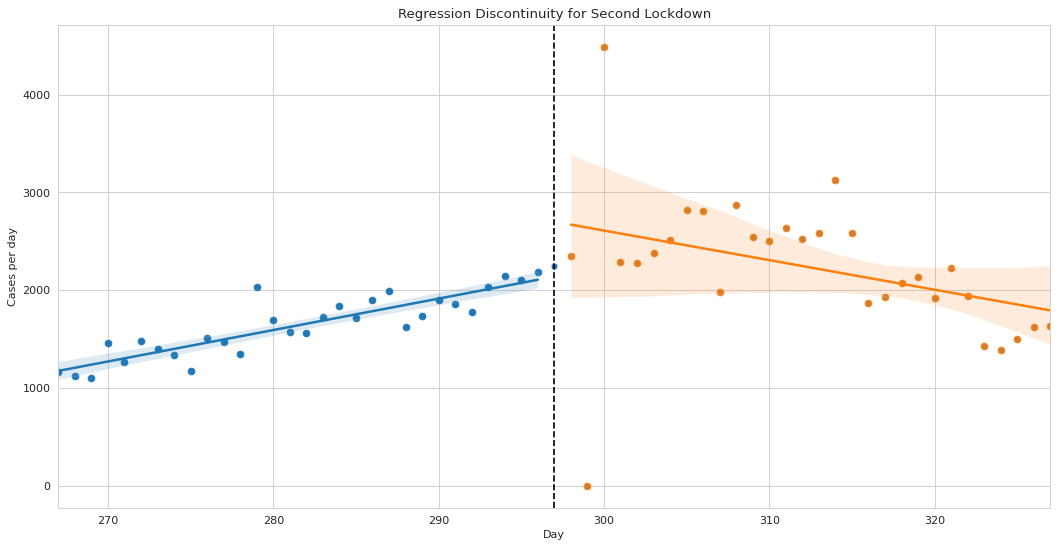

In [ ]:
plt.figure(figsize=(16, 8), dpi=80)
sns.scatterplot(x='num_of_days', y='numtoday', data=df_3)
sns.regplot(x='num_of_days', y='numtoday', data=rdd_df5)
sns.regplot(x='num_of_days', y='numtoday', data=rdd_df6)
plt.title("Regression Discontinuity for Second Lockdown")
plt.axvline(x=297, ls='--', c='black')
plt.xlabel("Day")
plt.ylabel("Cases per day")
model_second_lockdown.summary()


* At Christmas time, the data analysis yields an R-squared value of 0.170, which is not significant at all. 
* Furthermore, the p-value of the number of positive Covid-19 cases (-2442.13) with a standard error (1261.56) was not significant as a p-value was 0.133

As such, regardless of the data, the t-test indicates the data from this period is not usable for the analysis : as previously noted, reporting variations during the 2020 holidays and in early January 2021 cast doubt on the trendline.